In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from datetime import timedelta, datetime
import time
from scipy.sparse import coo_matrix
from shapely.geometry import Point, LineString, MultiLineString
from shapely import ops
import networkx as nx
import matplotlib.pyplot as plt
import folium
import pickle
import warnings
import sys

warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [2]:
# add paths for modules
sys.path.append('../src/models')
sys.path.append('../src/visualization')
sys.path.append('../src/features')
# import modules
import visualize
import geometry_utils
from maritime_traffic_network import MaritimeTrafficNetwork

['/Users/janhendrikwebert/maritime_route_prediction/notebooks', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python311.zip', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/lib-dynload', '', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/site-packages', '../src/models', '../src/visualization', '../src/features', '../visualization', '../features']


In [3]:
# load network from pickle
fileObj = open('../models/networks/202204_waypoints_DP10_HDBSCAN15_stavanger_2M_UTM.obj', 'rb')
network = pickle.load(fileObj)
fileObj.close()

In [4]:
network.get_trajectories_info()

Number of AIS messages: 1843903
Number of trajectories: 3848
Coordinate Reference System (CRS): EPSG:32632


In [5]:
network.prune_graph(1)
network.merge_stop_points(max_speed=2)

------------------------
Pruned Graph:
Number of nodes: 844 (22 isolated)
Number of edges: 3199
------------------------


Evaluating graph on 1000 trajectories
Progress: 10%...20%...30%...40%...50%...60%...70%...80%...90%...Done!


TypeError: unsupported operand type(s) for +: 'float' and 'list'

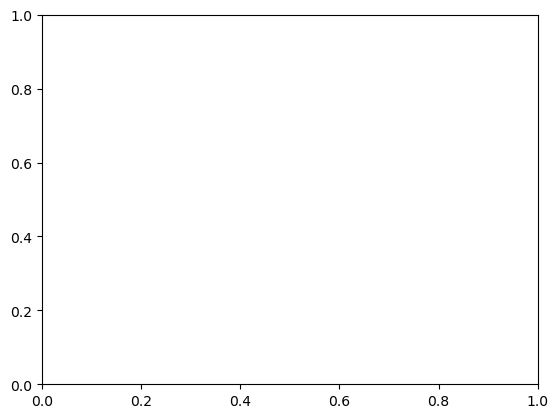

In [6]:
selection = np.arange(2000,3000,1)
mmsis = network.significant_points.mmsi.unique()[selection]  # 500, 200, 1700, 2900, 3800
trajectories = network.trajectories.filter('mmsi', mmsis.tolist())
all_paths, all_evaluation_results = network.evaluate_graph(trajectories)

In [ ]:
# Generate plot
#map = network.map_graph(pruned=False)
#map = trajectories.to_line_gdf()[['geometry', 'mmsi']].explore(m=map, style_kwds={'weight':1, 'color':'black', 'opacity':0.5}, 
                                                               name=mmsi)
#map = trajectory_points[['geometry', 'mmsi']].explore(m=map, marker_kwds={'radius':1}, 
#                                                        style_kwds={'color':'black', 'fillColor':'black', 'fillOpacity':1}, 
#                                                        name=mmsi+' points')
#map = eval_points.reset_index()[['geometry', 'mmsi']].explore(m=map, color='grey', marker_kwds={'radius':1})
#map = all_paths.explore(m=map, color='yellow', name=mmsi+' path')
#map = dijkstra_path.explore(m=map, color='orange', name=mmsi+' dijkstra path')
#map = waypoints[waypoints.clusterID.isin([359, 546])]['geometry'].explore(m=map)
#folium.LayerControl().add_to(map)

#map


In [ ]:
map.save('dummy2.html')